In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


# Basic Libraries

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, confusion_matrix , f1_score

In [3]:
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

We have records of 30000 customers. Below are the description of all features we have.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1 = male, 2 = female)

EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
22338,22339,120000.0,2,2,1,25,0,0,0,0,...,70420.0,62549.0,47683.0,4000.0,3000.0,11299.0,1943.0,2000.0,1684.0,0
12879,12880,200000.0,2,1,1,32,0,0,0,0,...,25213.0,68126.0,9636.0,9216.0,7013.0,15000.0,10000.0,10000.0,10000.0,0
6142,6143,500000.0,1,1,1,56,0,0,0,0,...,93725.0,95517.0,97581.0,3248.0,5140.0,3510.0,3461.0,3646.0,3770.0,0
9789,9790,240000.0,2,3,1,33,0,0,0,0,...,366.0,725.0,2576.0,7000.0,1030.0,7.0,725.0,2217.0,158215.0,0
3138,3139,200000.0,1,3,2,40,-2,-2,-2,-2,...,390.0,418.0,1604.0,1799.0,390.0,390.0,418.0,1604.0,0.0,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

# Univriate exploration and Pre processing

In [7]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

<Axes: xlabel='default.payment.next.month', ylabel='count'>

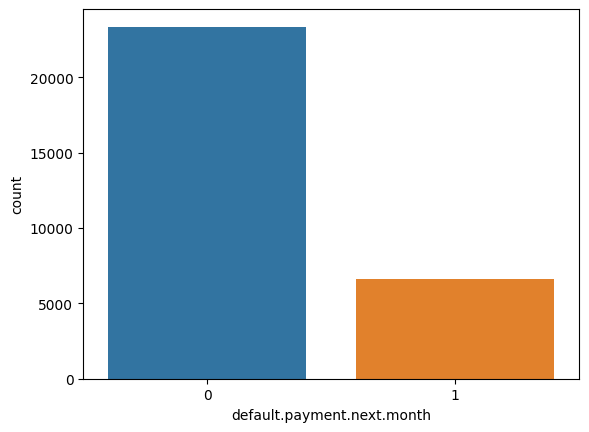

In [8]:
sns.countplot(x='default.payment.next.month', data=df)

In [9]:
df['MARRIAGE'].value_counts(normalize = True).sort_index()

MARRIAGE
0    0.001800
1    0.455300
2    0.532133
3    0.010767
Name: proportion, dtype: float64

In [10]:
# since 0 and 3 both denote as others so merging it together as 3
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

In [11]:
df['EDUCATION'].value_counts(normalize = True).sort_index()

EDUCATION
0    0.000467
1    0.352833
2    0.467667
3    0.163900
4    0.004100
5    0.009333
6    0.001700
Name: proportion, dtype: float64

In [12]:
# Since description about 0,4,5,6 is unknown and data is also comparatively less so I am merging it together as 0 = others
df['EDUCATION'] = df['EDUCATION'].replace({0: 0, 5: 0, 6: 0, 4: 0})

In [13]:
df['SEX'].value_counts(normalize = True).sort_index()

SEX
1    0.396267
2    0.603733
Name: proportion, dtype: float64

In [14]:
df['AGE'].value_counts(normalize = True).sort_index()

AGE
21    0.002233
22    0.018667
23    0.031033
24    0.037567
25    0.039533
26    0.041867
27    0.049233
28    0.046967
29    0.053500
30    0.046500
31    0.040567
32    0.038600
33    0.038200
34    0.038733
35    0.037100
36    0.036933
37    0.034700
38    0.031467
39    0.031800
40    0.029000
41    0.027467
42    0.026467
43    0.022333
44    0.023333
45    0.020567
46    0.019000
47    0.016700
48    0.015533
49    0.015067
50    0.013700
51    0.011333
52    0.010133
53    0.010833
54    0.008233
55    0.006967
56    0.005933
57    0.004067
58    0.004067
59    0.002767
60    0.002233
61    0.001867
62    0.001467
63    0.001033
64    0.001033
65    0.000800
66    0.000833
67    0.000533
68    0.000167
69    0.000500
70    0.000333
71    0.000100
72    0.000100
73    0.000133
74    0.000033
75    0.000100
79    0.000033
Name: proportion, dtype: float64

PAY_0
-2    0.091967
-1    0.189533
 0    0.491233
 1    0.122933
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 6    0.000367
 7    0.000300
 8    0.000633
Name: proportion, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PAY_0', ylabel='Count'>

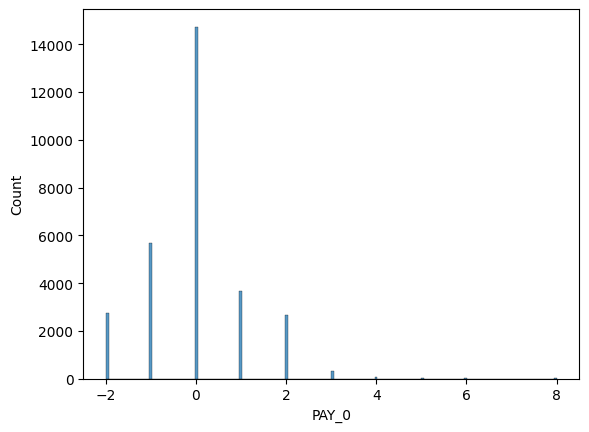

In [15]:
print(df['PAY_0'].value_counts(normalize = True).sort_index())
sns.histplot(df['PAY_0'])

In [16]:
# 4 indicates 4 or more months
df['PAY_0'] = df['PAY_0'].replace({5: 4, 6: 4, 6: 4, 7: 4 , 8:4})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PAY_2', ylabel='Count'>

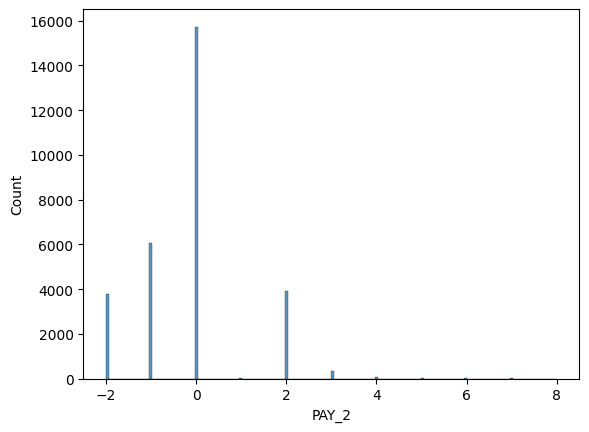

In [17]:
df['PAY_2'].value_counts(normalize = True).sort_index()
sns.histplot(df['PAY_2'])

In [18]:
# 4 indicates 4 or more months
df['PAY_2'] = df['PAY_2'].replace({5: 4, 6: 4, 6: 4, 7: 4 , 8:4})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PAY_3', ylabel='Count'>

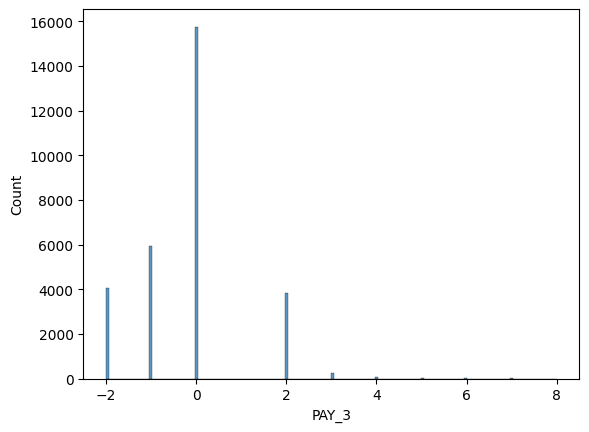

In [19]:
df['PAY_3'].value_counts(normalize = True).sort_index()
sns.histplot(df['PAY_3'])

In [20]:
# 4 indicates 4 or more months
df['PAY_3'] = df['PAY_3'].replace({5: 4, 6: 4, 6: 4, 7: 4 , 8:4})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PAY_4', ylabel='Count'>

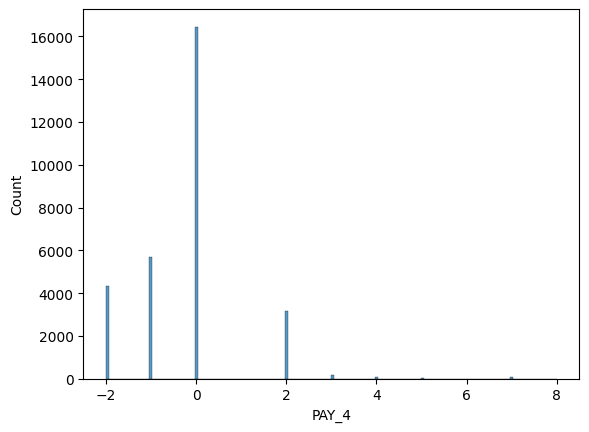

In [21]:
df['PAY_4'].value_counts(normalize = True).sort_index()
sns.histplot(df['PAY_4'])

In [22]:
# 4 indicates 4 or more months
df['PAY_4'] = df['PAY_4'].replace({5: 4, 6: 4, 6: 4, 7: 4 , 8:4})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PAY_5', ylabel='Count'>

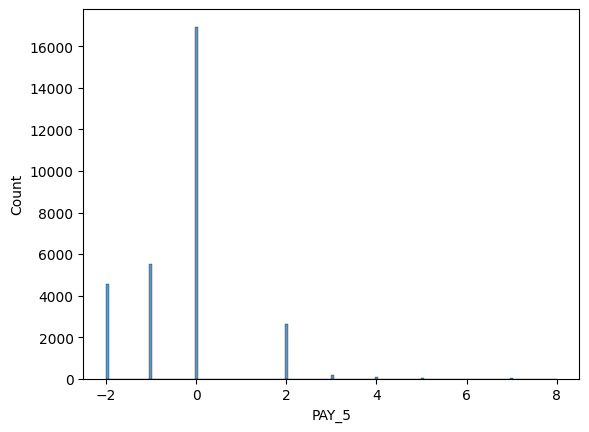

In [23]:
##### df['PAY_5'].value_counts(normalize = True).sort_index()
sns.histplot(df['PAY_5'])

Selecting suitable feature using ANOVA with threshold of P_value 0.01

In [24]:
# 4 indicates 4 or more months
df['PAY_5'] = df['PAY_5'].replace({5: 4, 6: 4, 6: 4, 7: 4 , 8:4})
# 4 indicates 4 or more months
df['PAY_6'] = df['PAY_6'].replace({5: 4, 6: 4, 6: 4, 7: 4 , 8:4})

In [25]:
df['SEX'] = df['SEX'].astype("category")
df['EDUCATION'] = df['EDUCATION'].astype("category")
df['MARRIAGE'] = df['MARRIAGE'].astype("category")
df['PAY_0'] = df['PAY_0'].astype("category")
df['PAY_2'] = df['PAY_2'].astype("category")
df['PAY_3'] = df['PAY_3'].astype("category")
df['PAY_4'] = df['PAY_5'].astype("category")
df['PAY_6'] = df['PAY_6'].astype("category")
df['PAY_5'] = df['PAY_5'].astype("category")
df['ID'] = df['ID'].astype("category")
df['AGE'] = df['AGE'].astype(float)

In [26]:
df.dtypes

ID                            category
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                            float64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default.payment.next.month       int64
dtype: object

In [27]:
y = df['default.payment.next.month']

In [28]:
X_numeric = df.drop(['ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6', 'default.payment.next.month' ] , axis = 1)

<Axes: >

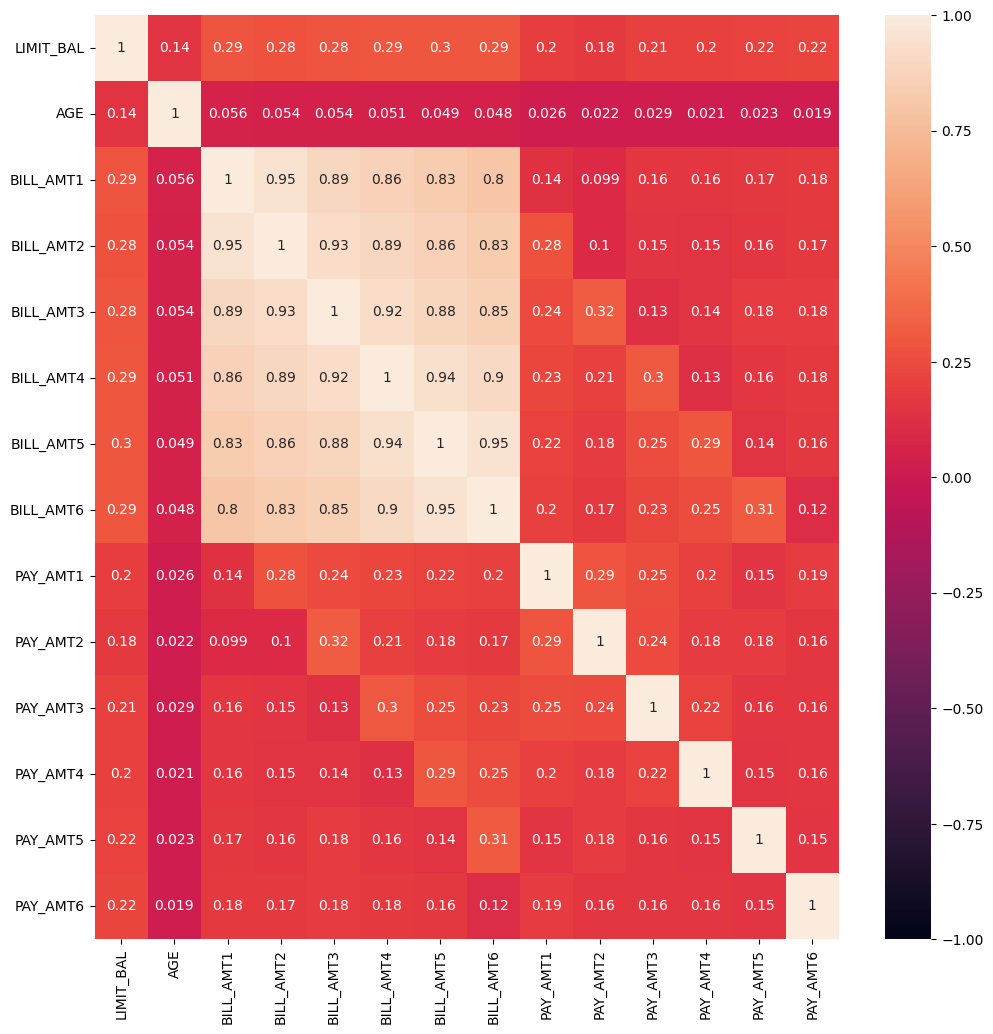

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(X_numeric.corr(), vmin= -1, vmax = 1 , annot = True)

# Feature selection

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

## Numeric Feature Selection

In [31]:
# selecting the numerical variables based on P Value

selector = SelectKBest(score_func=f_classif, k=13)
X_new = selector.fit_transform(X_numeric, y)
# Get selected feature names
selected_features = X_numeric.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')


In [32]:
# Get the F-values and p-values
f_values = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to display the feature names with their F-values and p-values
feature_scores = pd.DataFrame({
    'Feature': X_numeric.columns,
    'F-Value': f_values,
    'p-Value': p_values
})

# Sort the DataFrame by F-value in descending order
feature_scores = feature_scores.sort_values(by='F-Value', ascending=False)
feature_scores = pd.DataFrame(feature_scores)
# Display the feature scores
print(feature_scores)

      Feature     F-Value        p-Value
0   LIMIT_BAL  724.068539  1.302244e-157
8    PAY_AMT1  160.403810   1.146488e-36
9    PAY_AMT2  103.291524   3.166657e-24
11   PAY_AMT4   97.188000   6.830942e-23
10   PAY_AMT3   95.218011   1.841770e-22
12   PAY_AMT5   91.429801   1.241345e-21
13   PAY_AMT6   85.089045   3.033589e-20
2   BILL_AMT1   11.580532   6.673295e-04
3   BILL_AMT2    6.044238   1.395736e-02
4   BILL_AMT3    5.944388   1.476998e-02
1         AGE    5.788556   1.613685e-02
5   BILL_AMT4    3.094745   7.855564e-02
6   BILL_AMT5    1.371087   2.416344e-01
7   BILL_AMT6    0.865820   3.521225e-01


Selected Features

In [33]:
feature_scores[feature_scores['p-Value'] < 0.05]

,Feature,F-Value,p-Value
0,LIMIT_BAL,724.068539,1.302244e-157
8,PAY_AMT1,160.403810,1.146488e-36
9,PAY_AMT2,103.291524,3.166657e-24
11,PAY_AMT4,97.188000,6.830942e-23
10,PAY_AMT3,95.218011,1.841770e-22
12,PAY_AMT5,91.429801,1.241345e-21
13,PAY_AMT6,85.089045,3.033589e-20
2,BILL_AMT1,11.580532,6.673295e-04
3,BILL_AMT2,6.044238,1.395736e-02
4,BILL_AMT3,5.944388,1.476998e-02


At 0.05% level of significance we can select Numeric Features
* AGE
* Limit Bal
* Pay Amount 1,2,3,4,5,6
* Bill amount 1,2,3

Now Contingency Tables for Categorical Variables
SEX                             
EDUCATION                       
MARRIAGE                                                    
PAY_0                           
PAY_2                           
PAY_3                           
PAY_4                           
PAY_5                           
PAY_6                           

## Categorical Feature Selection

In [34]:
from scipy.stats import chi2_contingency

# Education vs default
contingency_table = pd.crosstab(df['EDUCATION'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
chi2_contingency(contingency_table)[1]

default.payment.next.month      0     1
EDUCATION                              
0                             435    33
1                            8549  2036
2                           10700  3330
3                            3680  1237


1.4950645648106153e-34

P value < 0.05 so Education is associated with the default

In [35]:
# Marriage vs default
contingency_table = pd.crosstab(df['MARRIAGE'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
chi2_contingency(contingency_table)[1]

default.payment.next.month      0     1
MARRIAGE                               
1                           10453  3206
2                           12623  3341
3                             288    89


7.790720364202813e-07

P value < 0.05 so Marriage is associated with the default

In [36]:
# PAY0 vs default
contingency_table = pd.crosstab(df['PAY_0'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
print(chi2_contingency(contingency_table)[1],"\n", chi2_contingency(contingency_table)[-1])

default.payment.next.month      0     1
PAY_0                                  
-2                           2394   365
-1                           4732   954
 0                          12849  1888
 1                           2436  1252
 2                            823  1844
 3                             78   244
 4                             52    89
0.0 
 [[ 2148.7092   610.2908]
 [ 4428.2568  1257.7432]
 [11477.1756  3259.8244]
 [ 2872.2144   815.7856]
 [ 2077.0596   589.9404]
 [  250.7736    71.2264]
 [  109.8108    31.1892]]


In [37]:
# PAY2 vs default
contingency_table = pd.crosstab(df['PAY_2'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
print(chi2_contingency(contingency_table)[1],"\n", chi2_contingency(contingency_table)[-1])

default.payment.next.month      0     1
PAY_2                                  
-2                           3091   691
-1                           5084   966
 0                          13227  2503
 1                             23     5
 2                           1743  2184
 3                            125   201
 4                             71    86
0.0 
 [[2.9454216e+03 8.3657840e+02]
 [4.7117400e+03 1.3382600e+03]
 [1.2250524e+04 3.4794760e+03]
 [2.1806400e+01 6.1936000e+00]
 [3.0583476e+03 8.6865240e+02]
 [2.5388880e+02 7.2111200e+01]
 [1.2227160e+02 3.4728400e+01]]


In [38]:
# PAY3 vs default
contingency_table = pd.crosstab(df['PAY_3'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
print(chi2_contingency(contingency_table)[1],"\n", chi2_contingency(contingency_table)[-1])

default.payment.next.month      0     1
PAY_3                                  
-2                           3328   757
-1                           5012   926
 0                          13013  2751
 1                              3     1
 2                           1850  1969
 3                            102   138
 4                             56    94
0.0 
 [[3.18139800e+03 9.03602000e+02]
 [4.62451440e+03 1.31348560e+03]
 [1.22770032e+04 3.48699680e+03]
 [3.11520000e+00 8.84800000e-01]
 [2.97423720e+03 8.44762800e+02]
 [1.86912000e+02 5.30880000e+01]
 [1.16820000e+02 3.31800000e+01]]


In [39]:
# PAY4 vs default
contingency_table = pd.crosstab(df['PAY_4'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
print(chi2_contingency(contingency_table)[1],"\n", chi2_contingency(contingency_table)[-1])

default.payment.next.month      0     1
PAY_4                                  
-2                           3651   895
-1                           4642   897
 0                          13752  3195
 2                           1203  1423
 3                             65   113
 4                             51   113
0.0 
 [[ 3540.4248  1005.5752]
 [ 4313.7732  1225.2268]
 [13198.3236  3748.6764]
 [ 2045.1288   580.8712]
 [  138.6264    39.3736]
 [  127.7232    36.2768]]


In [40]:
# PAY5 vs default
contingency_table = pd.crosstab(df['PAY_5'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
print(chi2_contingency(contingency_table)[1],"\n", chi2_contingency(contingency_table)[-1])

default.payment.next.month      0     1
PAY_5                                  
-2                           3651   895
-1                           4642   897
 0                          13752  3195
 2                           1203  1423
 3                             65   113
 4                             51   113
0.0 
 [[ 3540.4248  1005.5752]
 [ 4313.7732  1225.2268]
 [13198.3236  3748.6764]
 [ 2045.1288   580.8712]
 [  138.6264    39.3736]
 [  127.7232    36.2768]]


In [41]:
# PAY6 vs default
contingency_table = pd.crosstab(df['PAY_6'], df['default.payment.next.month'])
print(contingency_table)

# P-Value
print(chi2_contingency(contingency_table)[1],"\n", chi2_contingency(contingency_table)[-1])

default.payment.next.month      0     1
PAY_6                                  
-2                           3914   981
-1                           4765   975
 0                          13217  3069
 2                           1365  1401
 3                             66   118
 4                             37    92
0.0 
 [[ 3812.226   1082.774 ]
 [ 4470.312   1269.688 ]
 [12683.5368  3602.4632]
 [ 2154.1608   611.8392]
 [  143.2992    40.7008]
 [  100.4652    28.5348]]


In [42]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(df[['AGE','LIMIT_BAL', 'BILL_AMT1','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

      feature        VIF
0       const  16.459838
1         AGE   1.022019
2   LIMIT_BAL   1.225945
3   BILL_AMT1   6.610422
4   BILL_AMT3   7.124991
5    PAY_AMT1   1.228785
6    PAY_AMT2   1.551755
7    PAY_AMT3   1.207687
8    PAY_AMT4   1.132527
9    PAY_AMT5   1.105920
10   PAY_AMT6   1.113447


Final Variables to consider are 
* AGE
* Limit BAL
* Bill Amount 1,3
* PAY AMOUNT 1,2,3,4,5,6

# One Hot Encoding

In [43]:
X = df.drop(['ID','default.payment.next.month' ,'BILL_AMT4','BILL_AMT5', 'BILL_AMT6'] , axis = 1)
X_cat = pd.get_dummies(X, columns = ['EDUCATION','SEX',
'MARRIAGE',
'PAY_0',
'PAY_2',
'PAY_3',
'PAY_4',
'PAY_5',
'PAY_6'], dtype = int, drop_first = True)

In [44]:
X_cat

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,26.0,2682.0,1725.0,2682.0,0.0,1000.0,1000.0,1000.0,0.0,...,0,1,0,0,0,0,0,1,0,0
2,90000.0,34.0,29239.0,14027.0,13559.0,1518.0,1500.0,1000.0,1000.0,1000.0,...,0,1,0,0,0,0,1,0,0,0
3,50000.0,37.0,46990.0,48233.0,49291.0,2000.0,2019.0,1200.0,1100.0,1069.0,...,0,1,0,0,0,0,1,0,0,0
4,50000.0,57.0,8617.0,5670.0,35835.0,2000.0,36681.0,10000.0,9000.0,689.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39.0,188948.0,192815.0,208365.0,8500.0,20000.0,5003.0,3047.0,5000.0,...,0,1,0,0,0,0,1,0,0,0
29996,150000.0,43.0,1683.0,1828.0,3502.0,1837.0,3526.0,8998.0,129.0,0.0,...,0,1,0,0,0,0,1,0,0,0
29997,30000.0,37.0,3565.0,3356.0,2758.0,0.0,0.0,22000.0,4200.0,2000.0,...,0,1,0,0,0,0,1,0,0,0
29998,80000.0,41.0,-1645.0,78379.0,76304.0,85900.0,3409.0,1178.0,1926.0,52964.0,...,0,1,0,0,0,1,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:

y = df['default.payment.next.month']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=0)

In [47]:
y_train.value_counts()

default.payment.next.month
0    18661
1     5339
Name: count, dtype: int64

# Model Fitting


## Logistic Regression

In [48]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7835
Confusion Matrix:
[[4701    2]
 [1297    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       0.00      0.00      0.00      1297

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred_proba = model.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

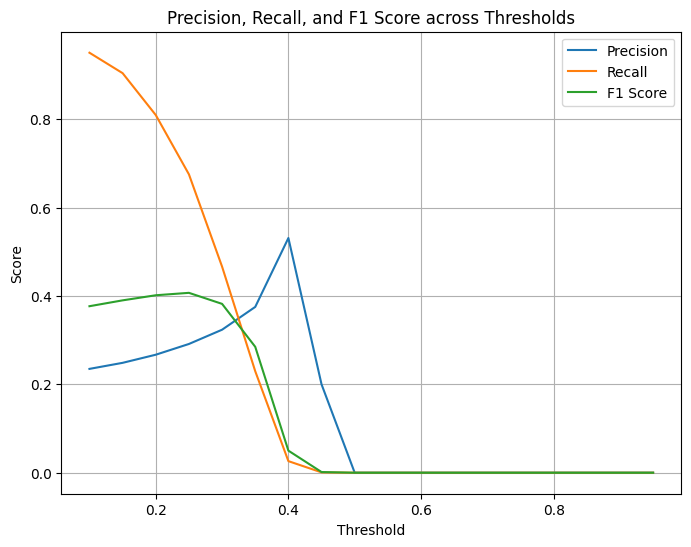

In [52]:
thresholds = [0.1,0.15, 0.2,0.25, 0.3, 0.35, 0.4,0.45, 0.5, 0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9, 0.95]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score across Thresholds')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8226666666666667
Confusion Matrix:
[[4454  249]
 [ 815  482]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4703
           1       0.66      0.37      0.48      1297

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# param_dist = {
#     'n_estimators': [126,127,129 ],
#     'max_depth': [28,30, 32],
#     'min_samples_split': [115, 125, 130]
# }

# # Initialize RandomizedSearchCV
# rf_random = GridSearchCV(estimator=model, param_grid=param_dist, verbose=2, n_jobs=-1, cv=3)

# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
# Make predictions
y_pred = rf_random.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

## XG BOOST

In [ ]:
import xgboost as xgb

In [ ]:
# Initialize and train the model
xgb_model = xgb.XGBClassifier(enable_categorical=True)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.1, 0.2]
# }
# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                            cv=3, verbose=2, n_jobs=-1)

# # Fit the grid search model
# grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
# Make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Using over sampling Techniques


## Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# Display class distribution before resampling
print("Before resampling:", Counter(y_train))
# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
# Display class distribution after RandomOverSampler
print("After RandomOverSampler:", Counter(y_ros))

## SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("After SMOTE:", Counter(y_smote))

In [ ]:
X_smote.columns

In [ ]:
nan_mask = X_smote.isna().any(axis=1)
nan_rows = X_smote[nan_mask]
print(f"Rows with NaN values:\n{nan_rows}")

## Logistic + Oversampling

In [ ]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_ros, y_ros)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

## Logistic + Smote

In [ ]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_smote, y_smote)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]
thresholds = [0.1,0.15, 0.2,0.25, 0.3, 0.35, 0.4,0.45, 0.5, 0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9, 0.95]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score across Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_mod = (y_pred_proba >= 0.4).astype(int)
cm1 = confusion_matrix(y_test , y_pred_mod)
precision = precision_score(y_test , y_pred_mod)
recall = recall_score(y_test , y_pred_mod)
f1score = f1_score(y_test , y_pred_mod)
print("Accuracy score : " , accuracy_score(y_test , y_pred_mod))
print("Precision score : " , precision)
print("Recall score : " , recall)
print("F1 score : " , f1score)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest + Oversampling
(to use grid search cv)

In [ ]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_ros, y_ros)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]
thresholds = [0.1,0.15, 0.2,0.25, 0.3, 0.35, 0.4,0.45, 0.5, 0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9, 0.95]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score across Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred_mod = (y_pred_proba >= 0.4).astype(int)
cm1 = confusion_matrix(y_test , y_pred_mod)
precision = precision_score(y_test , y_pred_mod)
recall = recall_score(y_test , y_pred_mod)
f1score = f1_score(y_test , y_pred_mod)
print("Accuracy score : " , accuracy_score(y_test , y_pred_mod))
print("Precision score : " , precision)
print("Recall score : " , recall)
print("F1 score : " , f1score)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Random Forest + SMOTE

In [ ]:
# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_smote, y_smote)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:,1]
thresholds = [0.1,0.15, 0.2,0.25, 0.3, 0.35, 0.4,0.45, 0.5, 0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9, 0.95]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score across Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred_mod = (y_pred_proba >= 0.4).astype(int)
cm1 = confusion_matrix(y_test , y_pred_mod)
precision = precision_score(y_test , y_pred_mod)
recall = recall_score(y_test , y_pred_mod)
f1score = f1_score(y_test , y_pred_mod)
print("Accuracy score : " , accuracy_score(y_test , y_pred_mod))
print("Precision score : " , precision)
print("Recall score : " , recall)
print("F1 score : " , f1score)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### XGBoost + Oversampling

In [ ]:
# Initialize and train the model
xgb_model = xgb.XGBClassifier(enable_categorical=True , n_estimators = 10)
xgb_model.fit(X_ros, y_ros)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
thresholds = [0.1,0.15, 0.2,0.25, 0.3, 0.35, 0.4,0.45, 0.5, 0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9, 0.95]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score across Thresholds')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred_mod = (y_pred_proba >= 0.6).astype(int)
cm1 = confusion_matrix(y_test , y_pred_mod)
precision = precision_score(y_test , y_pred_mod)
recall = recall_score(y_test , y_pred_mod)
f1score = f1_score(y_test , y_pred_mod)
print("Accuracy score : " , accuracy_score(y_test , y_pred_mod))
print("Precision score : " , precision)
print("Recall score : " , recall)
print("F1 score : " , f1score)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### XGBoost + SMOTE

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Initialize and train the model
xgb_model = xgb.XGBClassifier(enable_categorical=True , n_estimators = 50)
xgb_model.fit(X_smote, y_smote)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

# 